In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

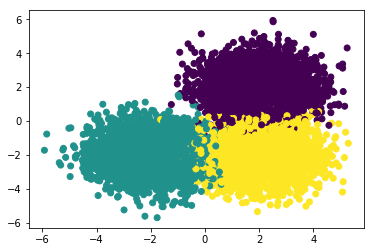

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


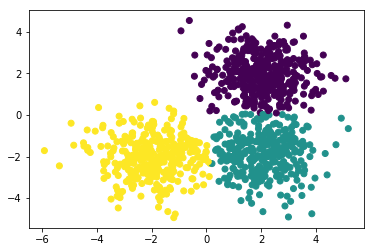

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

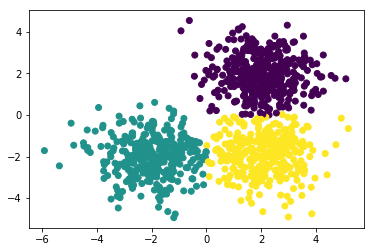

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      357    0    5
1        1  310    9
2        7    5  306


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 32


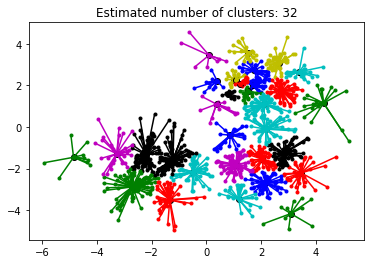

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

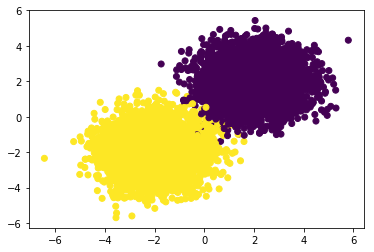

In [8]:

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=0)

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

#Divide into training and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=0)

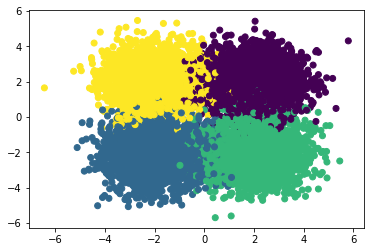

In [9]:

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=0)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

#Divide into training and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=0)

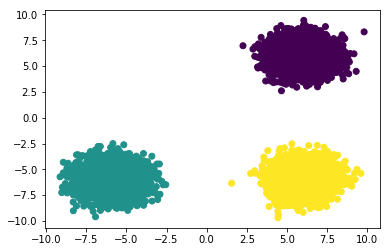

In [10]:
# The coordinates of the centers of our blobs.
centers = [[6, 6], [-6, -6], [6, -6]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=0)

plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()

#Divide into training and test sets.
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=0)

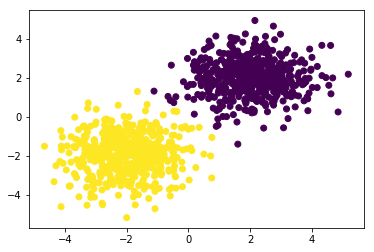

Comparing the Assigned Categories to the Ones In the Data:
col_0    0    1
row_0          
0      506    2
1        4  488


In [11]:
n_clusters=2

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train1)

predict1=sc.fit_predict(X_train1)

plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict1)
plt.show()

print('Comparing the Assigned Categories to the Ones In the Data:')
print(pd.crosstab(y_train1,predict1))

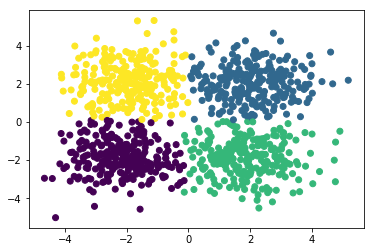

Comparing the Assigned Categories to the Ones In the Data:
col_0    0    1    2    3
row_0                    
0        0  239    7    3
1      249    0    8    2
2        4    5  227    0
3       12    5    0  239


In [12]:
n_clusters=4

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train2)

predict2=sc.fit_predict(X_train2)

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2)
plt.show()

print('Comparing the Assigned Categories to the Ones In the Data:')
print(pd.crosstab(y_train2,predict2))

Model Fitting Status: Complete.
Estimated Number of Clusters: 32


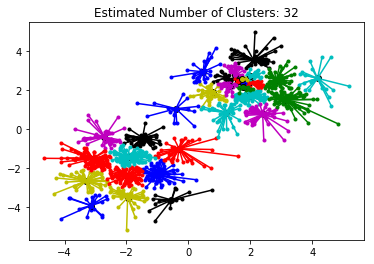

In [13]:
af1 = AffinityPropagation().fit(X_train1)
print('Model Fitting Status: Complete.')

cluster_centers_indices1 = af1.cluster_centers_indices_
n_clusters_1 = len(cluster_centers_indices1)
labels1 = af1.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters_1))

plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i, color in zip(range(n_clusters_1), colors):
    class_members1 = labels1 == i
    cluster_center1 = X_train1[cluster_centers_indices1[i]]
    plt.plot(X_train1[class_members1, 0], X_train1[class_members1, 1], color + '.')
    plt.plot(cluster_center1[0],
             cluster_center1[1],
             'o',
             markerfacecolor=color,
             markeredgecolor='k')
    for x in X_train1[class_members1]:
        plt.plot([cluster_center1[0], x[0]], [cluster_center1[1], x[1]], color)

plt.title('Estimated Number of Clusters: {}'.format(n_clusters_1))
plt.show()

Model Fitting Status: Complete.
Estimated Number of Clusters: 61


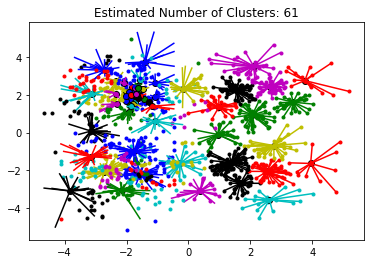

In [14]:
af2 = AffinityPropagation().fit(X_train2)
print('Model Fitting Status: Complete.')

cluster_centers_indices2 = af2.cluster_centers_indices_
n_clusters_2 = len(cluster_centers_indices2)
labels2 = af2.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters_2))

plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i, color in zip(range(n_clusters_2), colors):
    class_members2 = labels2 == i
    cluster_center2 = X_train2[cluster_centers_indices2[i]]
    plt.plot(X_train2[class_members2, 0], X_train1[class_members2, 1], color + '.')
    plt.plot(cluster_center2[0],
             cluster_center2[1],
             'o',
             markerfacecolor=color,
             markeredgecolor='k')
    for x in X_train2[class_members2]:
        plt.plot([cluster_center2[0], x[0]], [cluster_center2[1], x[1]], color)

plt.title('Estimated Number of Clusters: {}'.format(n_clusters_2))
plt.show()

Model Fitting Status: Complete.
Estimated Number of Clusters: 9


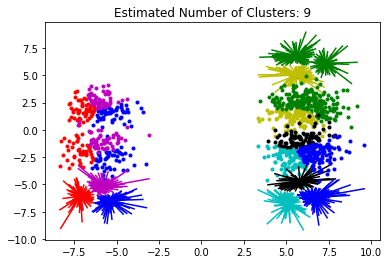

In [15]:
af3 = AffinityPropagation().fit(X_train3)
print('Model Fitting Status: Complete.')

cluster_centers_indices3 = af3.cluster_centers_indices_
n_clusters_3 = len(cluster_centers_indices3)
labels3 = af3.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters_3))

plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i, color in zip(range(n_clusters_3), colors):
    class_members3 = labels3 == i
    cluster_center3 = X_train3[cluster_centers_indices3[i]]
    plt.plot(X_train3[class_members3, 0], X_train1[class_members3, 1], color + '.')
    plt.plot(cluster_center3[0],
             cluster_center3[1],
             'o',
             markerfacecolor=color,
             markeredgecolor='k')
    for x in X_train3[class_members3]:
        plt.plot([cluster_center3[0], x[0]], [cluster_center3[1], x[1]], color)

plt.title('Estimated Number of Clusters: {}'.format(n_clusters_3))
plt.show()